## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

# Exercises in Clustering

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.metrics.cluster import silhouette_score

## 1
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

K-means clustering is an iterative algorithm that partitions data into a specified number of clusters (K) based on the proximity of data points to the cluster centers.

Choose K: You start by deciding how many clusters (K) you want.

Initialization: K initial centroids are chosen (often randomly).

Assignment: Each data point is assigned to the nearest centroid, forming temporary clusters.

Update: The centroids are recalculated as the average of all points in each cluster.

Iteration: The assignment and update steps repeat until the centroids stabilize and the clusters no longer change significantly.

In [2]:
# Load the dataset containing bike station locations
data = pd.read_csv('Ch5_bike_station_locations.csv')

In [3]:
data.head()

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620


Since we only have 2 variables we do not need to select data to fit the K-means model, as we will use all of it.

We try with two different K values to see the difference. One with K=3 and one with K=6. We can do this since K is a <b> hyper parameter

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [5]:
kmeans6 = KMeans(n_clusters=6)

kmeans6.fit(data)

KMeans(n_clusters=6)

After calling the fit() function, the clustering is done, as it is <b>unsupervised learning</b>. The clustering result is stored in an array called labels_. It stores a cluster label for each data point in the dataset.

In [6]:
kmeans.labels_

array([1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 0, 0,
       0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1,
       1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1,
       2, 1, 2, 0, 1, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 0, 2,
       0, 2], dtype=int32)

In [7]:
kmeans6.labels_

array([4, 5, 4, 3, 0, 0, 3, 2, 3, 5, 0, 3, 3, 3, 1, 1, 1, 4, 0, 3, 2, 4,
       1, 5, 1, 5, 4, 1, 4, 2, 3, 5, 5, 1, 5, 0, 4, 3, 1, 4, 2, 4, 1, 1,
       3, 1, 5, 1, 2, 0, 2, 4, 2, 2, 5, 3, 3, 2, 4, 5, 1, 0, 0, 4, 2, 2,
       2, 4, 5, 4, 5, 5, 1, 4, 5, 5, 5, 1, 5, 0, 3, 0, 1, 0, 5, 1, 2, 1,
       2, 2, 1, 3, 0, 2, 2, 4, 1, 2, 4, 0, 1, 2, 1, 1, 5, 1, 1, 1, 1, 4,
       4, 1, 2, 1, 0, 2, 1, 1, 2, 5, 3, 5, 4, 0, 0, 5, 2, 2, 2, 2, 1, 1,
       0, 0, 4, 2, 3, 5, 0, 5, 1, 4, 4, 0, 1, 0, 0, 1, 4, 2, 0, 4, 2, 1,
       4, 5, 0, 3, 5, 5, 3, 2, 2, 2, 4, 3, 1, 0, 4, 2, 1, 4, 4, 3, 1, 1,
       2, 1, 4, 0, 2, 5, 5, 1, 5, 2, 2, 0, 2, 4, 2, 2, 0, 4, 2, 3, 5, 1,
       5, 4, 0, 1, 0, 1, 4, 5, 5, 0, 4, 4, 4, 2, 2, 1, 1, 3, 0, 5, 2, 4,
       1, 0, 5, 2, 4, 5, 5, 4, 2, 3, 4, 5, 4, 1, 3, 2, 3, 4, 2, 0, 2, 5,
       2, 5], dtype=int32)

Showing the centroids of the clusters

In [8]:
kmeans.cluster_centers_

array([[ 38.86020732, -76.99546966],
       [ 38.93786021, -77.04018118],
       [ 38.90451329, -76.96869612]])

In [9]:
kmeans6.cluster_centers_

array([[ 38.93343188, -77.07801812],
       [ 38.91889538, -77.0291298 ],
       [ 38.86440718, -76.99261834],
       [ 38.89204284, -76.93589428],
       [ 38.96131441, -77.02217605],
       [ 38.91672422, -76.98423317]])

Visualizing the result of the clustering. First we create a column with the assigned cluster to the dataset

In [10]:
data["3MeansCluster"] = kmeans.labels_

In [11]:
data["6MeansCluster"] = kmeans6.labels_

Plotting the points of data together with the assigned cluster and cluster centroids

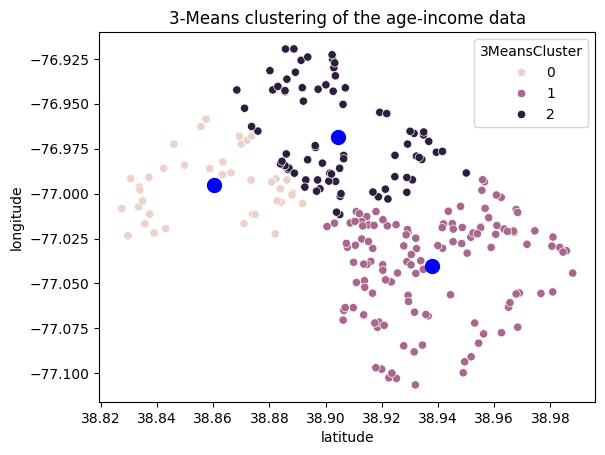

In [12]:
sns.scatterplot(data = data, x = "latitude", y = "longitude", hue = "3MeansCluster")
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color='blue', s = 100)
plt.title("3-Means clustering of the age-income data")
plt.show()

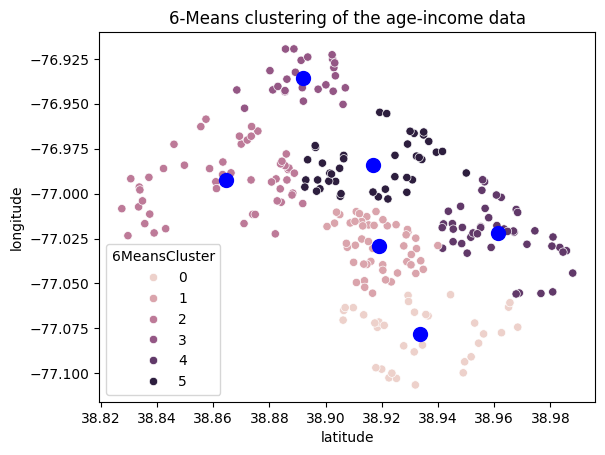

In [13]:
sns.scatterplot(data = data, x = "latitude", y = "longitude", hue = "6MeansCluster")
plt.scatter(x = kmeans6.cluster_centers_[:,0], y = kmeans6.cluster_centers_[:,1], color='blue', s = 100)
plt.title("6-Means clustering of the age-income data")
plt.show()

## Data Scaling

Creates a Min-Max Scaler (MinMaxScaler()), which rescales all features to a range of [0,1]. This can be important for K-Means to avoid one feature dominating due to larger values.

In [14]:
minMaxScaler = MinMaxScaler()
data_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(data), columns=data.columns)

In [15]:
kmeans_scaled = KMeans(n_clusters=4)
kmeans_scaled.fit(data_scaled_mm)

KMeans(n_clusters=4)

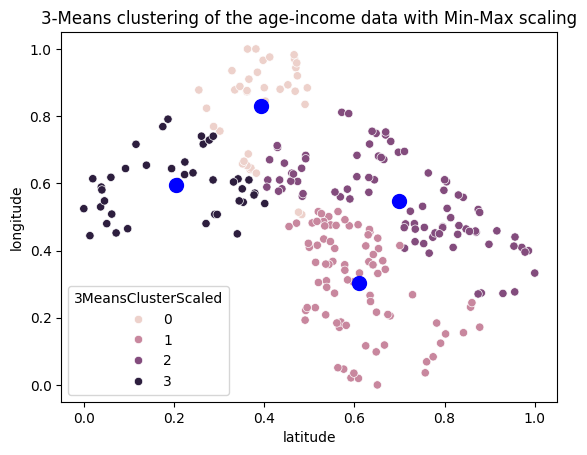

In [16]:
data_scaled = data_scaled_mm.copy()
data_scaled["3MeansClusterScaled"] = kmeans_scaled.labels_

sns.scatterplot(data = data_scaled, x = "latitude", y = "longitude", hue = "3MeansClusterScaled")
plt.scatter(x = kmeans_scaled.cluster_centers_[:,0], y = kmeans_scaled.cluster_centers_[:,1], color='blue', s = 100)
plt.title("3-Means clustering of the age-income data with Min-Max scaling")
plt.show()

In [17]:
data["3MeansClusterScaled"] = kmeans_scaled.labels_

In [18]:
centroids = minMaxScaler.inverse_transform(kmeans_scaled.cluster_centers_)

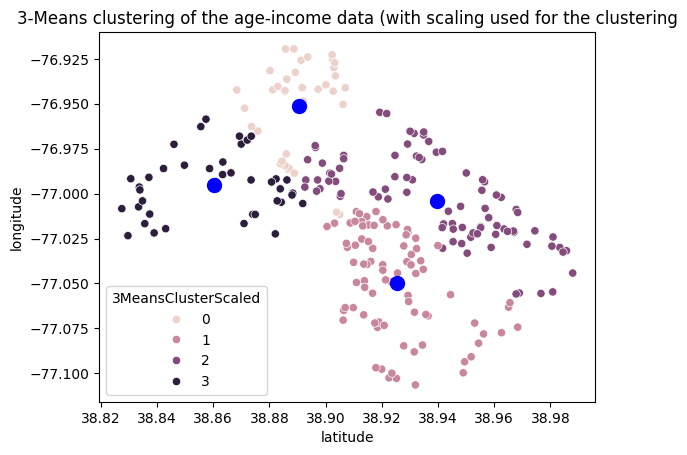

In [19]:
sns.scatterplot(data = data, x = "latitude", y = "longitude", hue = "3MeansClusterScaled")
plt.scatter(x = centroids[:,0], y = centroids[:,1], color='blue', s = 100)
plt.title("3-Means clustering of the age-income data (with scaling used for the clustering")
plt.show()

<b>using the Elbow Method and Visualizing best result for K

Defines an empty list errors to store the Sum of Squared Errors (SSE) for different values of K (number of clusters).
Creates a range of values (1 to 19) for K to test different numbers of clusters in K-Means. We then loop through the different values of K.

In [20]:
errors = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled_mm)
    errors.append(kmeanModel.inertia_)

Plotting the errors (SSE) values against K, using blue crosses ('bx-')

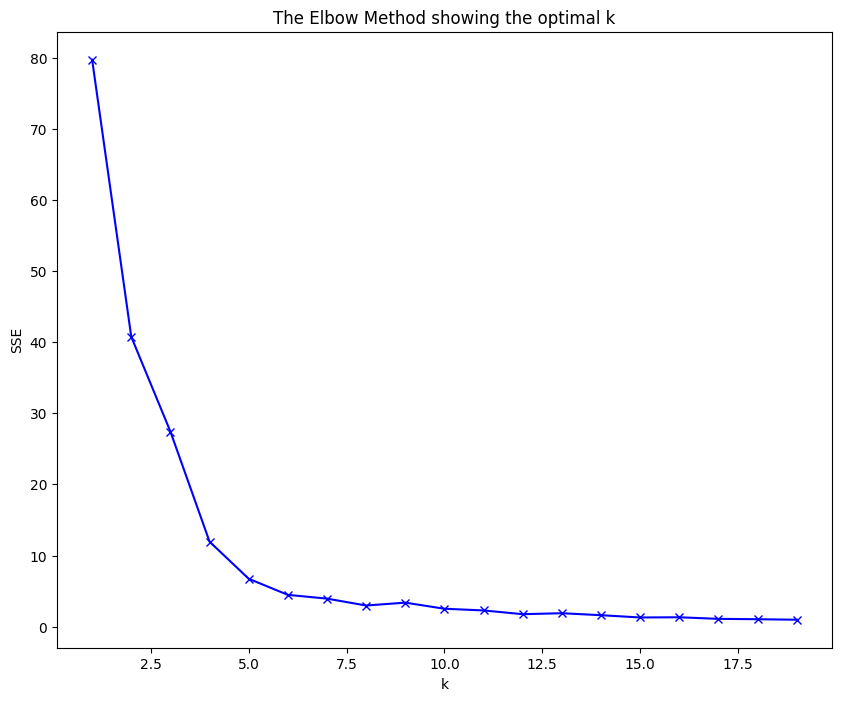

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(K, errors, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The SSE (Sum of Squared errors) decreases sharply from K = 1 to K = 4.
At K = 4 or 5, the rate of decrease slows significantly.
Beyond K = 6, the reduction in SSE is minimal, indicating that adding more clusters does not provide a significant improvement.

In [22]:
for i in range(1, len(errors)):
    print('K={0}: {1}'.format(i+1, errors[i-1] - errors[i]))

K=2: 38.946307993070235
K=3: 13.323196033027621
K=4: 15.478813990316388
K=5: 5.211484092230021
K=6: 2.2641712923183137
K=7: 0.5293733184443816
K=8: 0.9671017711411927
K=9: -0.4030759909245356
K=10: 0.8573904964113077
K=11: 0.23936397997620995
K=12: 0.526212037112056
K=13: -0.13603571250996827
K=14: 0.278562382084119
K=15: 0.3197635010054065
K=16: -0.029106386894988567
K=17: 0.22474178530898037
K=18: 0.05034422577691933
K=19: 0.06985612453584134


Again it seems like 4 and 5 might be good choices, since the rate of decrease in SSE are slowed down significally after 5. i will go with 4

## 2
2. Visualize the K-Means clustering result for the best K.

Creates a K-Means model with n_clusters=4.
Fits the model to the scaled data (data_scaled_mm) to generate 4 clusters.
Using scaled data ensures that the clustering is not biased by differences in feature ranges.

In [23]:
kmeans_scaled4 = KMeans(n_clusters=4)
kmeans_scaled4.fit(data_scaled_mm)

data["4MeansClusterScaled"] = kmeans_scaled4.labels_
centroids4 = minMaxScaler.inverse_transform(kmeans_scaled4.cluster_centers_)

Retrieves the cluster centroids generated by K-Means.
Inverse transforms them using minMaxScaler to convert them back to their original scale.
This is necessary since clustering was performed on scaled data, but visualization requires the original coordinates.

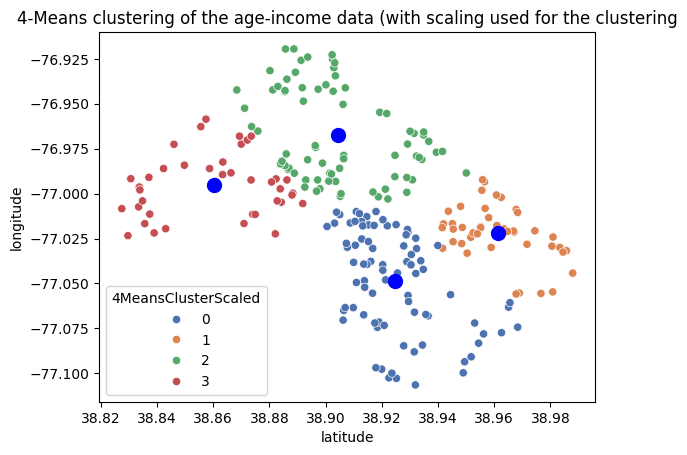

In [24]:
sns.scatterplot(data = data, x = "latitude", y = "longitude", hue = "4MeansClusterScaled", palette="deep")
plt.scatter(x = centroids4[:,0], y = centroids4[:,1], color='blue', s = 100)
plt.title("4-Means clustering of the age-income data (with scaling used for the clustering")
plt.show()

## 3. Agglomerative Clustering

3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.

Agglomerative clustering is a type of hierarchical clustering that builds clusters in a step-by-step, bottom-up manner.

Start Small: Each data point starts as its own individual cluster.
Merge Process: The algorithm repeatedly merges the closest clusters based on a distance metric (like Euclidean distance).

Hierarchical Tree: This merging process creates a tree-like structure called a dendrogram, which shows how clusters are combined.

Choosing Clusters: "cut" the dendrogram at a certain level to choose the number of clusters you want.

Building the agglomerative clustering model. Same as K-means model

In [25]:
aggClustering = AgglomerativeClustering()
aggClustering.fit(data_scaled_mm)

AgglomerativeClustering()

Getting cluster assignments

In [26]:
data["aggCluster"] = aggClustering.labels_
data["aggCluster"]

0      1
1      1
2      1
3      1
4      0
      ..
239    0
240    0
241    1
242    0
243    1
Name: aggCluster, Length: 244, dtype: int64

Visualizing the Agglomerative clustering

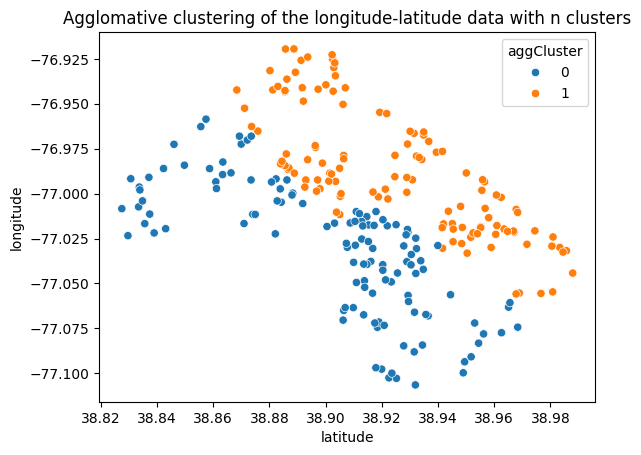

In [27]:
sns.scatterplot(data = data, x = "latitude", y = "longitude", hue = "aggCluster")
plt.title("Agglomative clustering of the longitude-latitude data with n clusters")
plt.show()

## Dendogram

Uses the 'ward' method, which minimizes variance within clusters.
The Ward method ensures that clusters are compact and balanced.
Creates a dendrogram, which visually represents the clustering hierarchy.

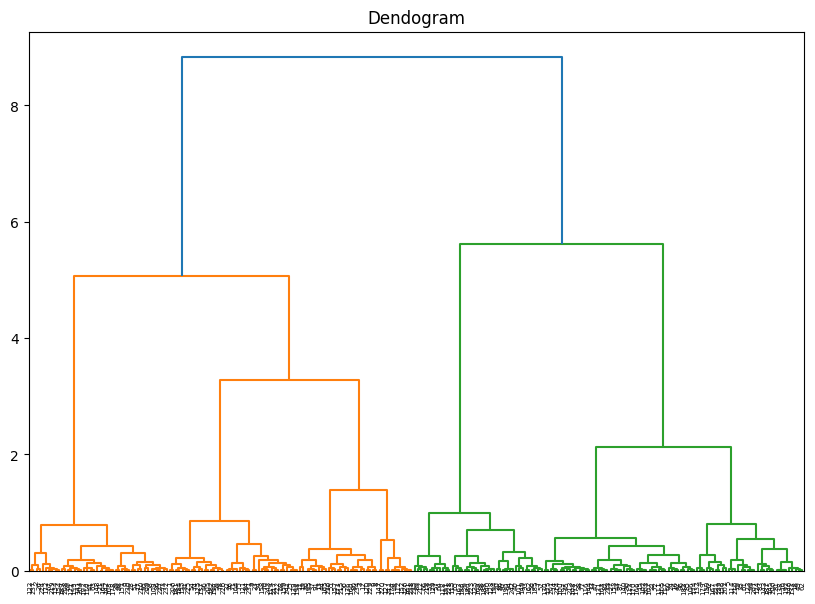

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(data_scaled_mm, method='ward'))
plt.show()

Adding a horizontal line to split the data

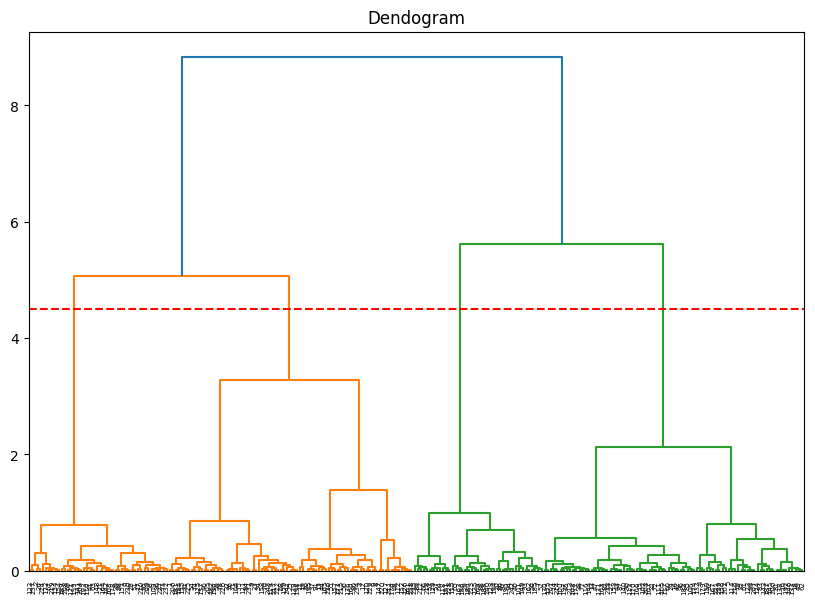

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(data_scaled_mm, method='ward'))

plt.axhline(y=4.5, color='r', linestyle='--')

plt.show()

The best K is found by "cutting" the dendrogram at an appropriate height.
The horizontal red line (y=4.5) cuts the largest vertical gaps.

The red line intersects 4 vertical lines, suggesting K=4 is a good choice.

Since i already made with 4 clusters there is no need to change it.

## 4
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.

In [30]:
aggClustering = AgglomerativeClustering(n_clusters=4)
aggClustering.fit(data_scaled_mm)

AgglomerativeClustering(n_clusters=4)

In [31]:
data["4aggCluster"] = aggClustering.labels_
data["4aggCluster"]

0      3
1      0
2      3
3      0
4      1
      ..
239    1
240    2
241    0
242    2
243    0
Name: 4aggCluster, Length: 244, dtype: int64

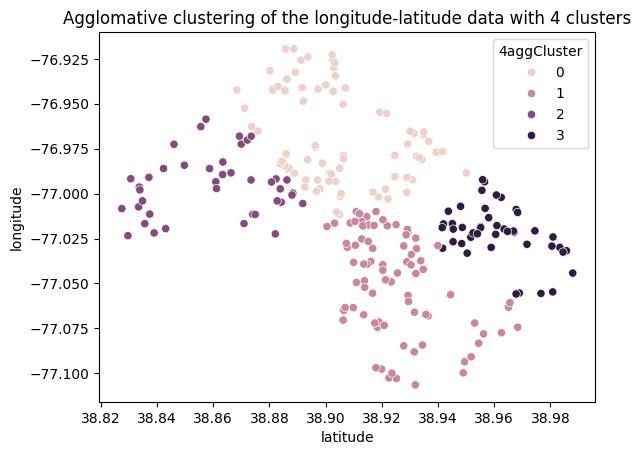

In [32]:
sns.scatterplot(data = data, x = "latitude", y = "longitude", hue = "4aggCluster")
plt.title("Agglomative clustering of the longitude-latitude data with 4 clusters")
plt.show()

## 5. DBSCAN

5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups points together based on how close they are to each other.

Density Focus: It looks for regions where points are densely packed.
Core Points: A point is considered a “core point” if there are enough points nearby (within a set distance, called epsilon).

Cluster Formation: Starting from a core point, DBSCAN groups together all nearby points that are also densely packed.

Outliers: Points that don’t belong to any cluster are labeled as noise or outliers 

we use .fit_predict instead of .fit to get the clustering assignments directly. 

Deviding the data into clusters using DBSCAN

In [33]:
# Apply DBSCAN clustering on scaled data
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust parameters as needed
clusters_DBSCAN = dbscan.fit_predict(data_scaled)


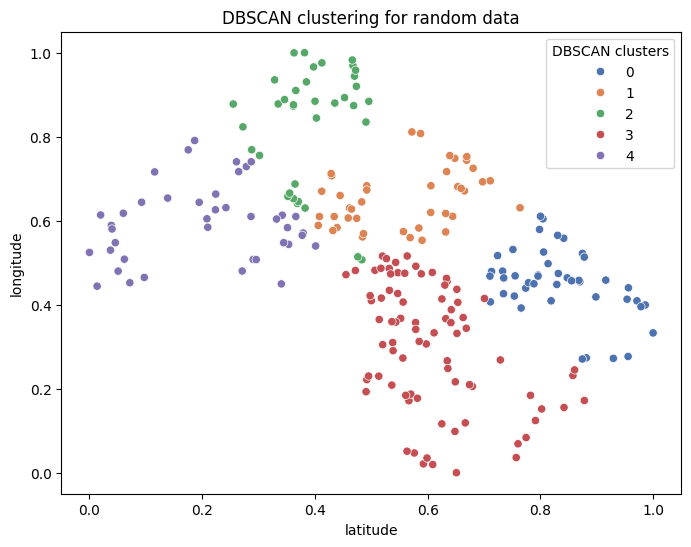

In [34]:
data_scaled["DBSCAN clusters"] = clusters_DBSCAN  # Assigning to data_scaled to match clustering

# Convert cluster labels to string to avoid issues with `hue`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_scaled, x="latitude", y="longitude", hue=data_scaled["DBSCAN clusters"].astype(str), palette="deep")
plt.title("DBSCAN clustering for random data")
plt.show()

Trying different values for min_samples and eps

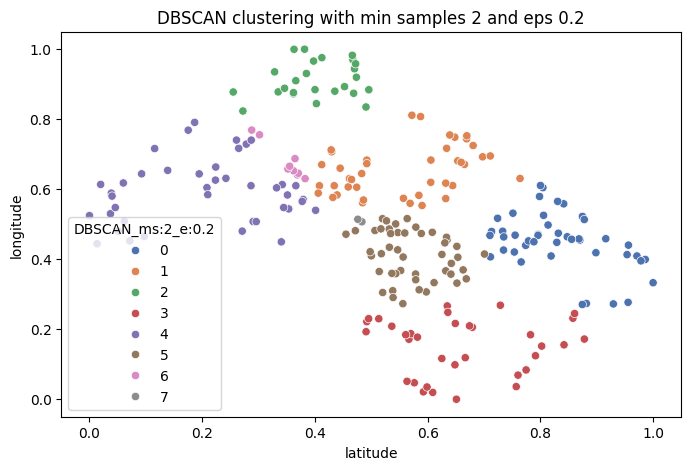

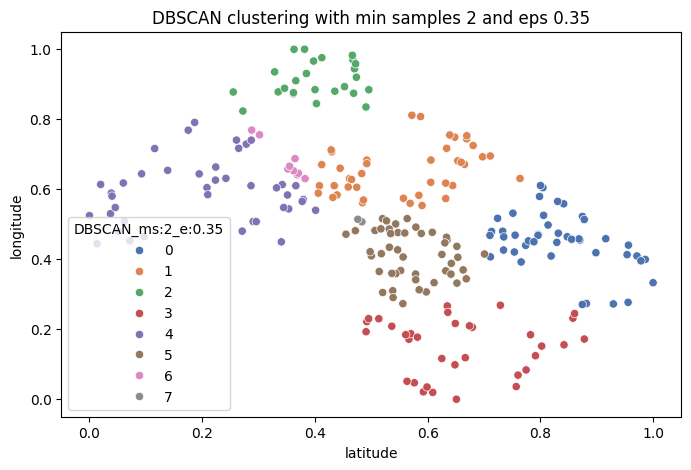

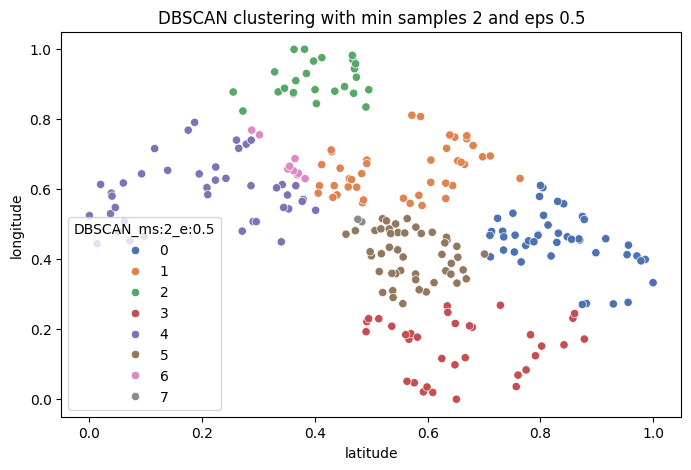

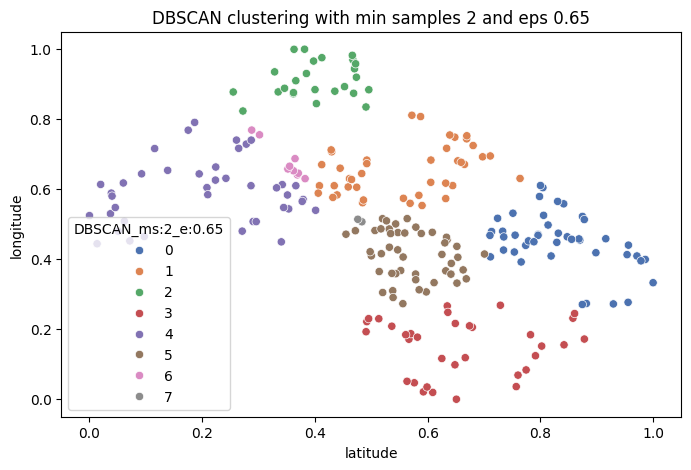

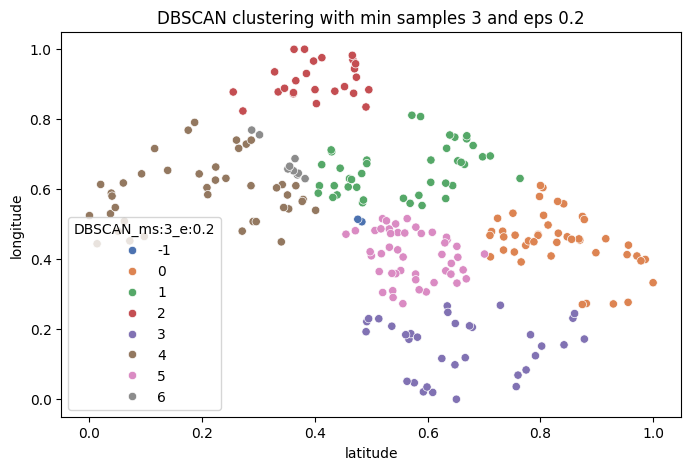

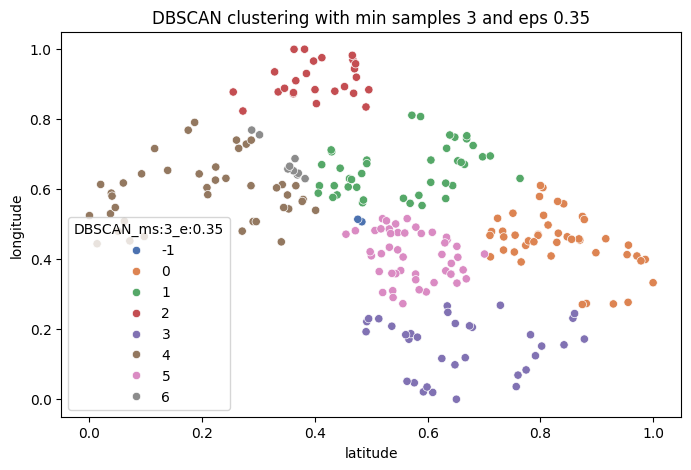

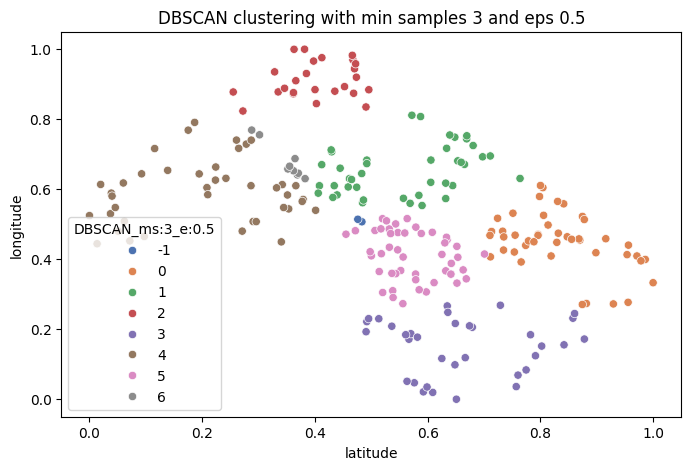

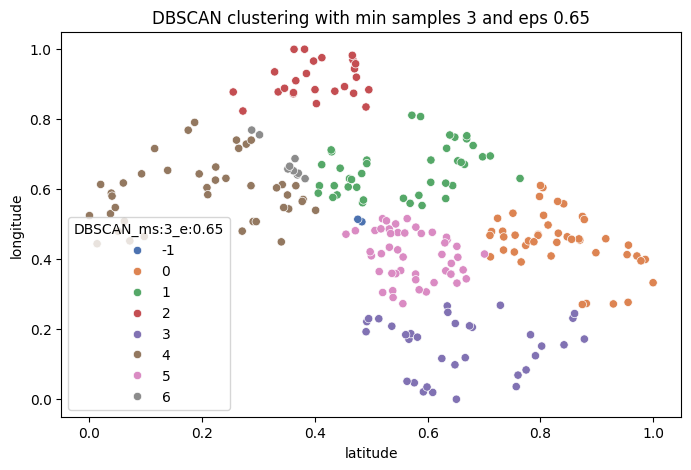

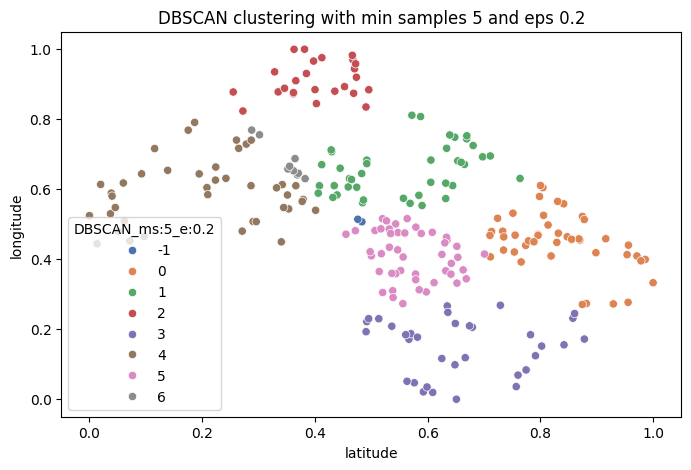

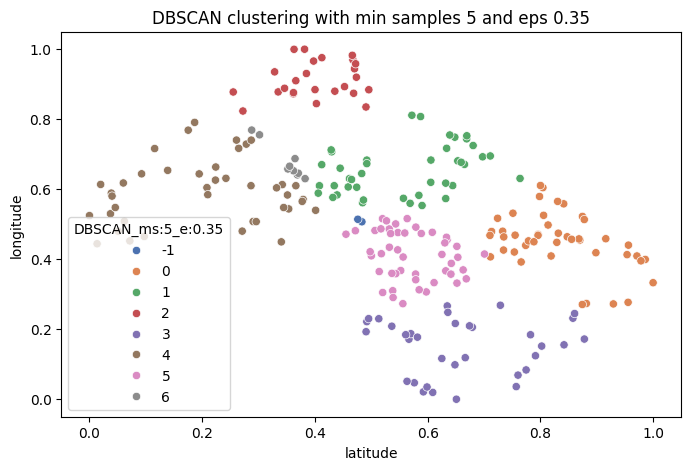

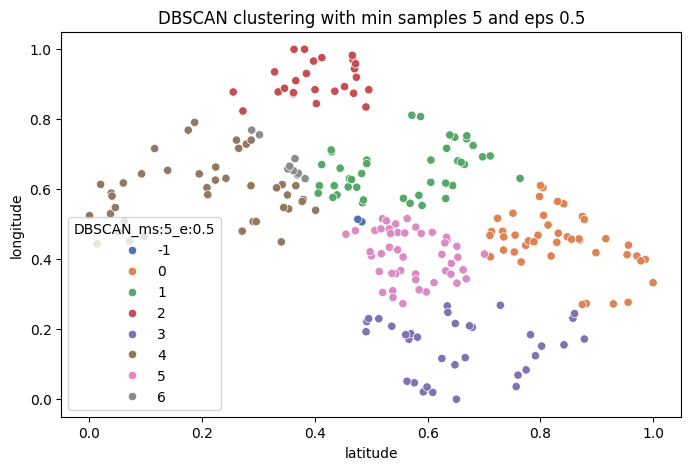

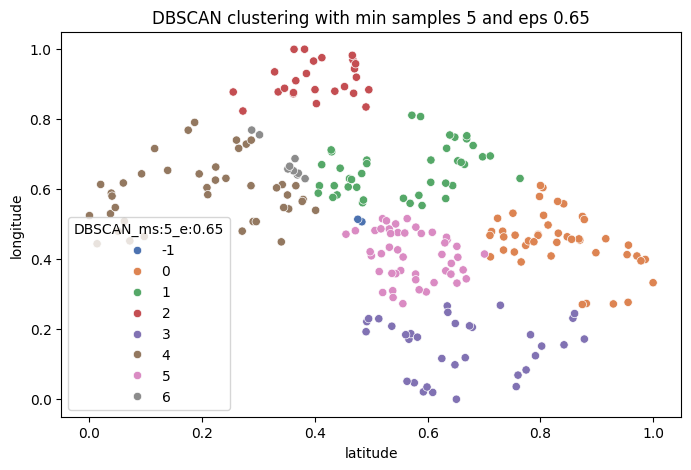

Best DBSCAN parameters: eps=0.2, min_samples=3, Silhouette Score=0.6866830893254505


In [35]:
minSamples = [2, 3, 5]
eps = [0.2, 0.35, 0.5, 0.65]

best_minSamples = None
best_eps = None
best_silhouette_dbscan = -1


for ms in minSamples:
    for e in eps:
        dbscan = DBSCAN(min_samples = ms, eps = e)
        clusters = dbscan.fit_predict(data_scaled) 
        data_scaled["DBSCAN_ms:{0}_e:{1}".format(ms, e)] = dbscan.labels_
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data = data_scaled, x = "latitude", y = "longitude", hue = "DBSCAN_ms:{0}_e:{1}".format(ms, e), palette="deep")
        plt.title("DBSCAN clustering with min samples {0} and eps {1}".format(ms, e))

        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

        if n_clusters > 0 and -1 in clusters:
            silhouette = silhouette_score(data_scaled_mm,clusters)
            if silhouette > best_silhouette_dbscan:
                best_silhouette_dbscan = silhouette
                best_eps = e
                best_min_samples=ms
                
plt.show()
print(f"Best DBSCAN parameters: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_silhouette_dbscan}")

<b> Making the best DBSCAN clustering

In [36]:
# Apply DBSCAN clustering on scaled data
dbscan = DBSCAN(eps=0.2, min_samples=3)  # Adjust parameters as needed
clusters_DBSCAN = dbscan.fit_predict(data_scaled)

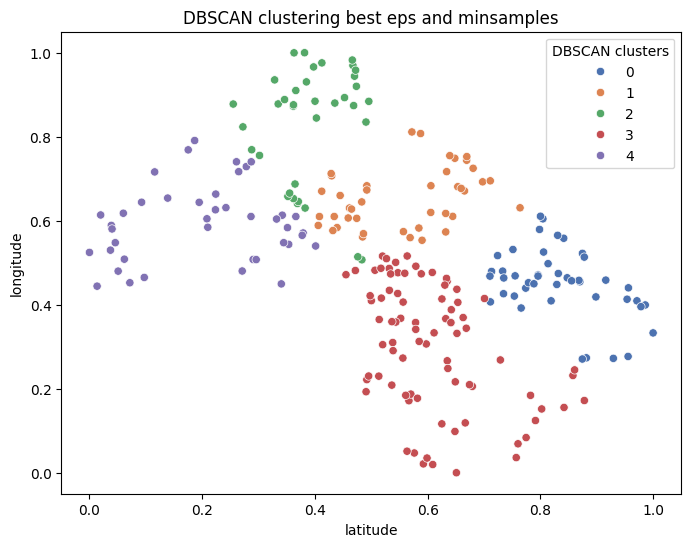

In [37]:
data["DBSCAN clusters"] = clusters_DBSCAN  # Assigning to data_scaled to match clustering

# Convert cluster labels to string to avoid issues with `hue`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_scaled, x="latitude", y="longitude", hue=data_scaled["DBSCAN clusters"].astype(str), palette="deep")
plt.title("DBSCAN clustering best eps and minsamples")
plt.show()

trying different values for 'min_samples' and 'eps'

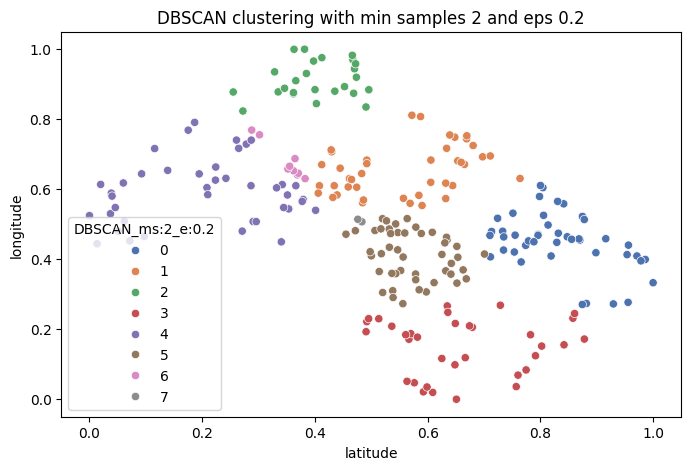

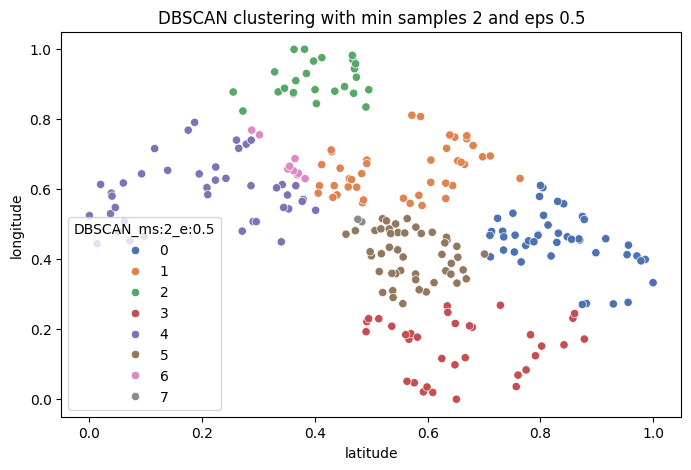

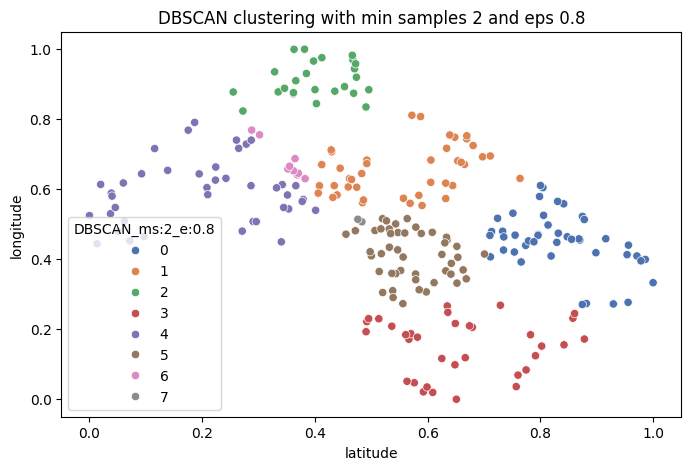

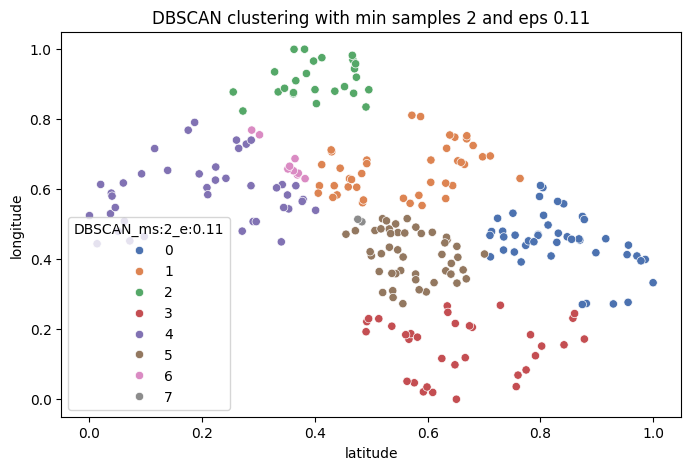

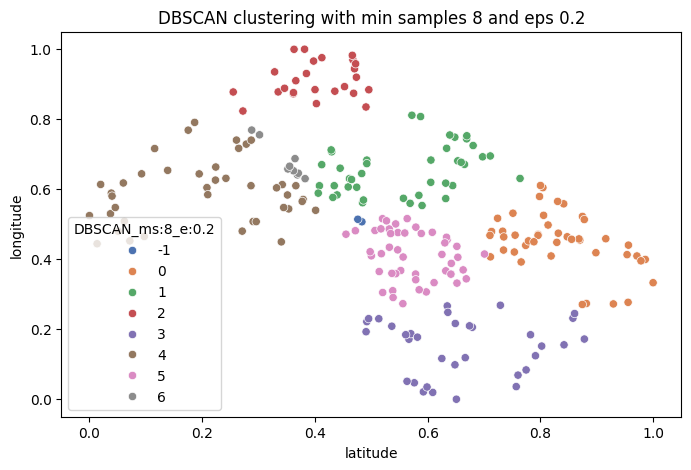

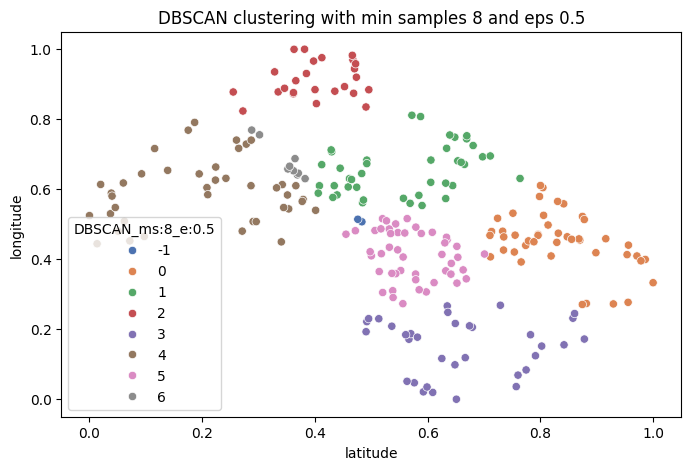

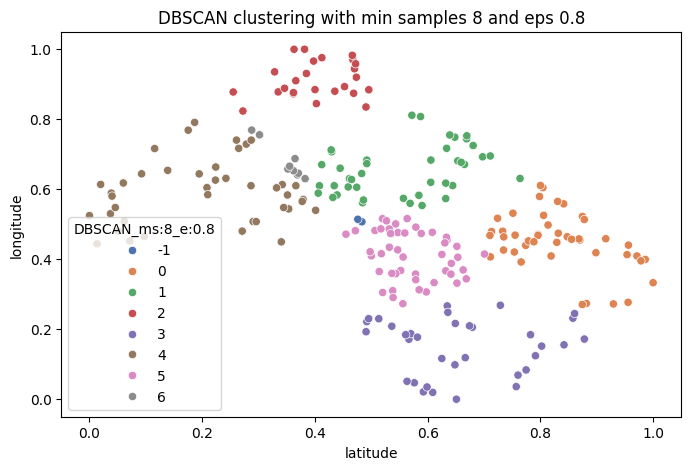

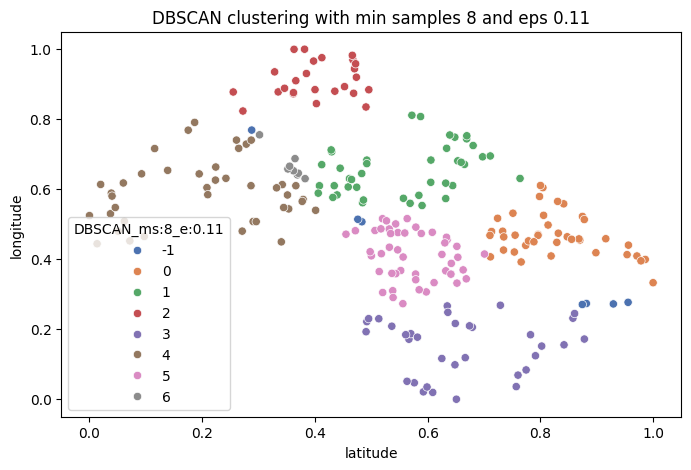

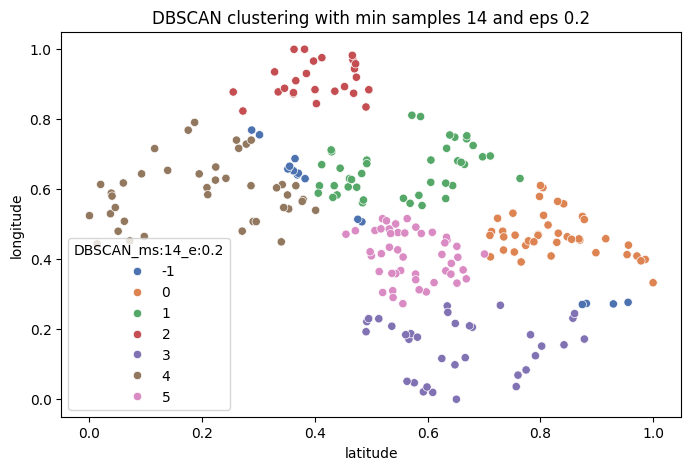

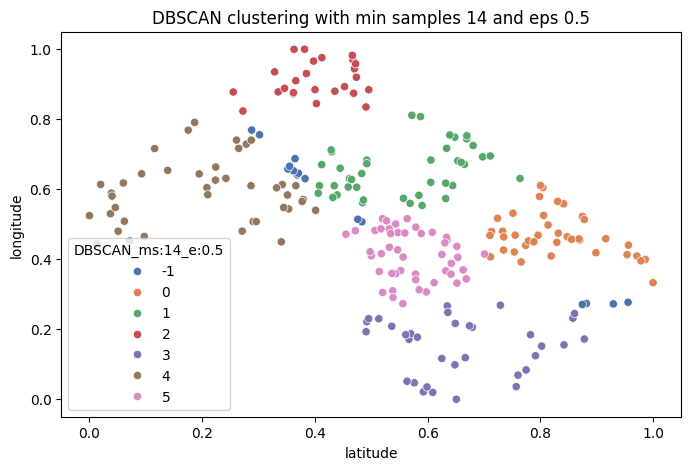

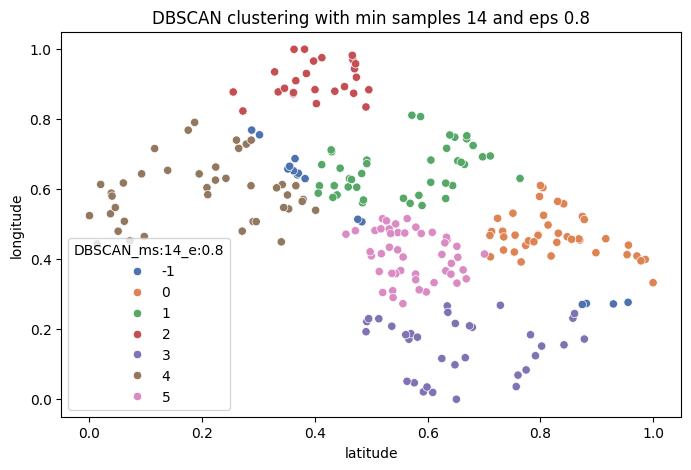

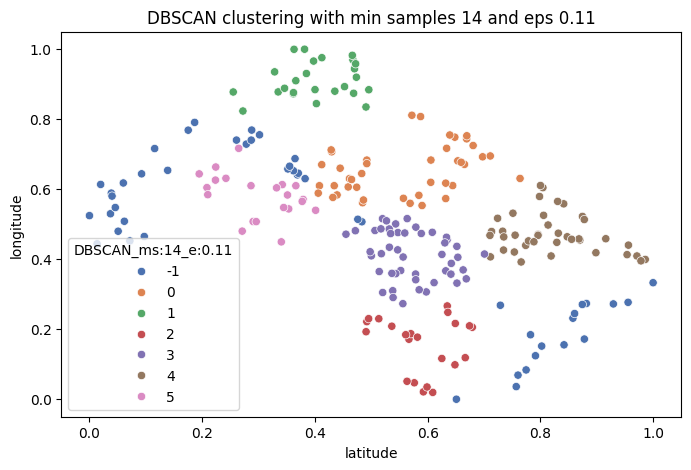

In [38]:
minSamples = [2, 8, 14]
eps = [0.2, 0.5, 0.8, 0.11]

for ms in minSamples:
    for e in eps:
        dbscan = DBSCAN(min_samples = ms, eps = e)
        clusters = dbscan.fit_predict(data_scaled) 
        data_scaled["DBSCAN_ms:{0}_e:{1}".format(ms, e)] = dbscan.labels_
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data = data_scaled, x = "latitude", y = "longitude", hue = "DBSCAN_ms:{0}_e:{1}".format(ms, e), palette="deep")
        plt.title("DBSCAN clustering with min samples {0} and eps {1}".format(ms, e))
plt.show()

From this we can see that 8 -1 represents the outliers

## Calculating Silhouette Scores - Evaluating data

In [39]:
# Remove noise points (-1) from DBSCAN before calculating silhouette score
dbscan_filtered = data[data["DBSCAN clusters"] != -1]

# Compute silhouette scores for each clustering method
SilScore_df = pd.DataFrame({
    "Clustering method": ["4MeansClusterScaled", "aggCluster", "DBSCAN clusters"], 
    "Silhouette Score": [
        silhouette_score(X=data_scaled, labels=data["4MeansClusterScaled"]),  # K-Means
        silhouette_score(X=data_scaled, labels=data["4aggCluster"]),          # Agglomerative
        silhouette_score(X=dbscan_filtered, labels=dbscan_filtered["DBSCAN clusters"])  # DBSCAN (filtered)
    ]
})

# Display the results
SilScore_df

,Clustering method,Silhouette Score
0,4MeansClusterScaled,0.371289
1,aggCluster,0.378165
2,DBSCAN clusters,0.991421


Since the Silhouette score is closest to 1 with the DBSCAN cluster it seems to create the most meaningful clusters